In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [255]:
def pre_format_convert_columns(df):
    farmer_group= df.groupby(['Year','owner-id'])['implements-WSA']
    # year 1 or bigger
    for year in df['Year'].unique()[1:]:
        for farmer in df['owner-id'].unique():
            group = farmer_group.get_group((year, farmer))
            group_last_year = farmer_group.get_group((year-1, farmer))
            if (group.item() == 1.0) & (group_last_year.item() == 0.0):
                df.loc[group.index.item(), 'convert-to-WSA'] = 1
                df.loc[group.index.item(), 'converted-in-year'] = year
    return df

In [256]:
def format_convert_columns(df):
    dff = pd.DataFrame(columns = df.columns)
    for run in df['UniqueID'].unique():
        sub_df = df[df['UniqueID'] == run]
        sub_df = pre_format_convert_columns(sub_df)
        dff = pd.concat([dff, sub_df])
    return dff

In [257]:
def format_df(csv_path):
    df = pd.read_csv(csv_path)
    df['convert-to-WSA'] = 0
    df['converted-in-year'] = np.nan   # first year of wsa 
    df['knows-but-does-not-implement'] = 0
    df = df.drop(df[df['implements-WSA'] == 'implements-WSA'].index)
    df = df.astype({'owner-id':'float64', 'Year':'int64', 'xcor':'float64',
                'ycor':'float64', 'implements-WSA':'float64', 'owner-knows-WSA':'float64',
                 'yield':'float64', 'TotalYearRainfall':'float64', 'who':'int64',
                  'LeadFarmers':'int64' })
    df = format_convert_columns(df)
    ## make column knows-but-does-not-implement 1 for rows that need it
    df.loc[(df['implements-WSA'] == 0) & (df['owner-knows-WSA'] == 1), 
           'knows-but-does-not-implement'] = 1
    return df

In [258]:
df_5_no_c = format_df('modelOutputParamCombo0')
df_5_no_w = format_df('modelOutputParamCombo9')
df_5_no_w

/tmp/ipykernel_95901/1089986846.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dff = pd.concat([dff, sub_df])
/tmp/ipykernel_95901/1089986846.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dff = pd.concat([dff, sub_df])


,owner-id,Year,xcor,ycor,implements-WSA,owner-knows-WSA,yield,TotalYearRainfall,who,LeadFarmers,SocialScenario,ClimateScenario,UniqueID,convert-to-WSA,converted-in-year,knows-but-does-not-implement
0,0.0,0,-24.5,22.50,0.0,0.0,200.000000,0.000000,4,5,No Desperation,Warm Climate,2023-11-28 19:53:28.375456,0,NaN,0
1,0.0,1,-24.5,22.50,0.0,0.0,232.529866,434.277079,4,5,No Desperation,Warm Climate,2023-11-28 19:53:28.375456,0,NaN,0
2,0.0,2,-24.5,22.50,0.0,0.0,221.982791,790.809540,4,5,No Desperation,Warm Climate,2023-11-28 19:53:28.375456,0,NaN,0
3,0.0,3,-24.5,22.50,0.0,0.0,225.806924,881.814459,4,5,No Desperation,Warm Climate,2023-11-28 19:53:28.375456,0,NaN,0
4,0.0,4,-24.5,22.50,0.0,0.0,228.363800,1020.357248,4,5,No Desperation,Warm Climate,2023-11-28 19:53:28.375456,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248004,799.0,26,19.0,-16.25,1.0,1.0,241.879130,1469.055054,4,5,No Desperation,Warm Climate,2023-11-28 19:54:15.288471,0,NaN,0
248005,799.0,27,19.0,-16.25,1.0,1.0,242.355640,1631.687391,4,5,No Desperation,Warm Climate,2023-11-28 19:54:15.288471,0,NaN,0
248006,799.0,28,19.0,-16.25,1.0,1.0,247.686274,1428.967197,4,5,No Desperation,Warm Climate,2023-11-28 19:54:15.288471,0,NaN,0
248007,799.0,29,19.0,-16.25,1.0,1.0,235.229544,1557.718957,4,5,No Desperation,Warm Climate,2023-11-28 19:54:15.288471,0,NaN,0


In [259]:
df_5_no_w.nunique()

owner-id                           800
Year                                31
xcor                               747
ycor                               731
implements-WSA                       2
owner-knows-WSA                      2
yield                           222935
TotalYearRainfall                   31
who                                 11
LeadFarmers                          1
SocialScenario                       1
ClimateScenario                      1
UniqueID                            10
convert-to-WSA                       2
converted-in-year                   19
knows-but-does-not-implement         2
dtype: int64

In [219]:
df_model1 = df[df['UniqueID'] == '2023-11-28 18:48:06.098940']
df_model1

,owner-id,Year,xcor,ycor,implements-WSA,owner-knows-WSA,yield,TotalYearRainfall,who,LeadFarmers,SocialScenario,ClimateScenario,UniqueID,convert-to-WSA,converted-in-year,knows-but-does-not-implement
0,0.0,0,11.5,-19.0,0.0,0.0,100.000000,0.000000,2,5,No Desperation,Current Climate,2023-11-28 18:48:06.098940,0,NaN,0
1,0.0,1,11.5,-19.0,0.0,0.0,93.141745,562.632809,2,5,No Desperation,Current Climate,2023-11-28 18:48:06.098940,0,NaN,0
2,0.0,2,11.5,-19.0,0.0,0.0,77.425217,864.589798,2,5,No Desperation,Current Climate,2023-11-28 18:48:06.098940,0,NaN,0
3,0.0,3,11.5,-19.0,0.0,0.0,70.696633,1040.690023,2,5,No Desperation,Current Climate,2023-11-28 18:48:06.098940,0,NaN,0
4,0.0,4,11.5,-19.0,0.0,0.0,86.459275,963.059953,2,5,No Desperation,Current Climate,2023-11-28 18:48:06.098940,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24795,799.0,26,-8.0,-23.5,0.0,0.0,145.949381,1266.171883,4,5,No Desperation,Current Climate,2023-11-28 18:48:06.098940,0,NaN,0
24796,799.0,27,-8.0,-23.5,0.0,1.0,139.730843,1277.112571,4,5,No Desperation,Current Climate,2023-11-28 18:48:06.098940,0,NaN,1
24797,799.0,28,-8.0,-23.5,0.0,1.0,187.377950,1317.856674,4,5,No Desperation,Current Climate,2023-11-28 18:48:06.098940,0,NaN,1
24798,799.0,29,-8.0,-23.5,0.0,1.0,107.267288,1456.247183,4,5,No Desperation,Current Climate,2023-11-28 18:48:06.098940,0,NaN,1


In [220]:
# def get_avg_yield_plot(df):
#     wsa_group = df.groupby(['Year', 'implements-WSA'])['yield'].mean()
#     wsa_yr_group = wsa_group.groupby('implements-WSA')

#     ax = plt.subplot()
#     ax.set(title="Average yield per year", xlabel="Year", ylabel="Average yield")
#     ax.plot(wsa_yr_group.get_group(0.0).tolist(), label = "Traditional")
#     ax.plot(wsa_yr_group.get_group(1.0).tolist(), label = "WSA")
#     ax.legend()

In [221]:
# get_avg_yield_plot(df_5_no_w)

In [260]:
wsa_group_c = df_5_no_c.groupby(['Year', 'implements-WSA'])['yield'].mean()
wsa_group_w = df_5_no_w.groupby(['Year', 'implements-WSA'])['yield'].mean()
wsa_group_c

Year  implements-WSA
0     0.0               162.610063
      1.0               155.000000
1     0.0               163.742495
      1.0               178.306647
2     0.0               157.200458
                           ...    
28    1.0               193.004678
29    0.0               134.159582
      1.0               169.429571
30    0.0               146.625696
      1.0               179.040031
Name: yield, Length: 62, dtype: float64

In [261]:
len(wsa_group_c)

62

In [262]:
wsa_yr_group_c = wsa_group_c.groupby('implements-WSA')
wsa_yr_group_w = wsa_group_w.groupby('implements-WSA')
wsa_yr_group_c

In [263]:
for implementsWSA, yld in wsa_yr_group_c:
    print(implementsWSA, yld)

0.0 Year  implements-WSA
0     0.0               162.610063
1     0.0               163.742495
2     0.0               157.200458
3     0.0               153.463656
4     0.0               157.065572
5     0.0               165.622764
6     0.0               171.408349
7     0.0               157.380819
8     0.0               153.859392
9     0.0               160.762695
10    0.0               159.132136
11    0.0               156.870190
12    0.0               162.865389
13    0.0               163.116319
14    0.0               157.316067
15    0.0               153.538236
16    0.0               167.823569
17    0.0               154.219232
18    0.0               146.890301
19    0.0               154.221792
20    0.0               153.835902
21    0.0               156.312275
22    0.0               156.746078
23    0.0               156.434761
24    0.0               151.407669
25    0.0               152.580179
26    0.0               150.344500
27    0.0               146.76

In [264]:
wsa_yr_group_w.get_group(0.0)

Year  implements-WSA
0     0.0               162.446541
1     0.0               178.524044
2     0.0               170.487834
3     0.0               171.890098
4     0.0               173.636364
5     0.0               179.630821
6     0.0               185.554078
7     0.0               177.489712
8     0.0               177.103779
9     0.0               180.766963
10    0.0               179.350321
11    0.0               177.457697
12    0.0               181.365658
13    0.0               181.011047
14    0.0               174.344620
15    0.0               175.428538
16    0.0               170.590918
17    0.0               171.464381
18    0.0               173.680059
19    0.0               169.607758
20    0.0               173.842466
21    0.0               175.072173
22    0.0               176.880675
23    0.0               174.574300
24    0.0               173.027741
25    0.0               174.775613
26    0.0               169.876909
27    0.0               170.253223

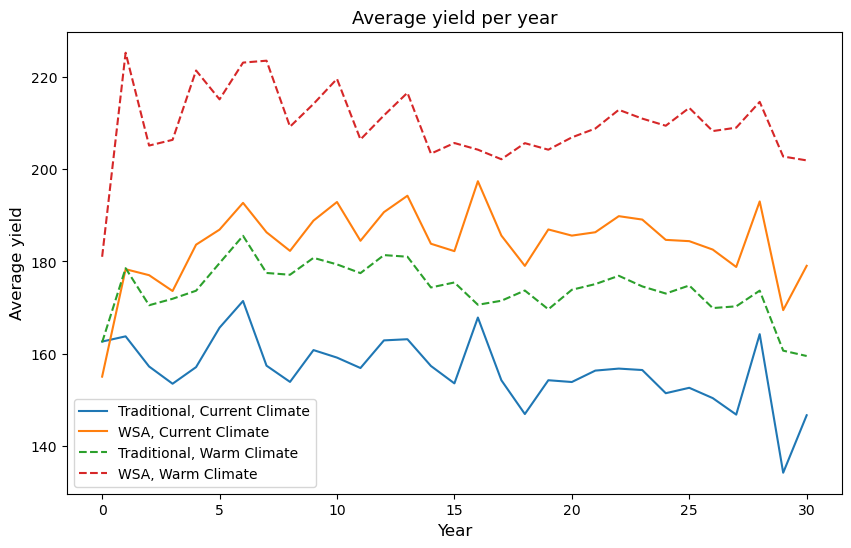

In [265]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

#ax.set(title="Average yield per year", xlabel="Year", ylabel="Average yield")
ax.plot(wsa_yr_group_c.get_group(0.0).tolist(), label = "Traditional, Current Climate")
ax.plot(wsa_yr_group_c.get_group(1.0).tolist(), label = "WSA, Current Climate")
ax.plot(wsa_yr_group_w.get_group(0.0).tolist(), label = "Traditional, Warm Climate", linestyle = 'dashed')
ax.plot(wsa_yr_group_w.get_group(1.0).tolist(), label = "WSA, Warm Climate", linestyle = 'dashed')
ax.set_title("Average yield per year", fontsize=13)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Average yield", fontsize=12)
ax.legend(loc='best')

In [228]:
farmer_group_5_no_c = df_5_no_c.groupby(['Year','owner-id'])['implements-WSA']
farmer_group_5_no_w = df_5_no_w.groupby(['Year','owner-id'])['implements-WSA']

In [229]:
farmer_group_5_no_c.groups

{(0, 0.0): [0, 24801, 49602, 74403, 83729, 124005, 148806, 173607, 198408, 223209], (0, 1.0): [31, 24832, 49633, 74434, 83760, 124036, 148837, 173638, 198439, 223240], (0, 2.0): [62, 24863, 49664, 74465, 83791, 124067, 148868, 173669, 198470, 223271], (0, 3.0): [93, 24894, 49695, 74496, 83891, 124098, 148899, 173700, 198501, 223302], (0, 4.0): [124, 24925, 49726, 74527, 83922, 124129, 148930, 173731, 198532, 223333], (0, 5.0): [155, 24956, 49757, 74558, 84021, 124160, 148961, 173762, 198563, 223364], (0, 6.0): [186, 24987, 49788, 74589, 84052, 124191, 148992, 173793, 198594, 223395], (0, 7.0): [217, 25018, 49819, 74620, 84150, 124222, 149023, 173824, 198625, 223426], (0, 8.0): [248, 25049, 49850, 74651, 84181, 124253, 149054, 173855, 198656, 223457], (0, 9.0): [279, 25080, 49881, 74682, 84279, 124284, 149085, 173886, 198687, 223488], (0, 10.0): [310, 25111, 49912, 74713, 84310, 124315, 149116, 173917, 198718, 223519], (0, 11.0): [341, 25142, 49943, 74744, 84341, 124346, 149147, 173948,

In [230]:
farmer_group_5_no_c.get_group((3, 11.0))

344       0.0
25145     0.0
49946     0.0
74747     0.0
84344     0.0
124349    0.0
149150    0.0
173951    0.0
198752    1.0
223553    0.0
Name: implements-WSA, dtype: float64

In [231]:
farmer_group_5_no_c.get_group((1, 0.0))

1         0.0
24802     0.0
49603     0.0
74404     0.0
83730     0.0
124006    0.0
148807    0.0
173608    0.0
198409    0.0
223210    0.0
Name: implements-WSA, dtype: float64

In [232]:
farmer_group_5_no_c.get_group((9, 796.0))

24685     0.0
49486     0.0
74287     0.0
114467    1.0
123889    1.0
148690    1.0
173491    0.0
198292    0.0
223093    0.0
247894    0.0
Name: implements-WSA, dtype: float64

In [233]:
s =farmer_group_5_no_c.get_group((3, 11.0)).reset_index()
idx = s['index']
farmer_group_5_no_c.get_group((3, 11.0))[idx[0]]

0.0

In [234]:
for i in idx:
    print(i)

344
25145
49946
74747
84344
124349
149150
173951
198752
223553


In [235]:
df_5_no_c.loc[28606, 'convert-to-WSA'] 

0

In [236]:
df_5_no_c['Year'].unique()[1:]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [237]:
df = df_5_no_c[df_5_no_c['UniqueID']== '2023-11-28 18:48:06.098940']
farmer_group= df.groupby(['Year','owner-id'])['implements-WSA']

In [238]:
s = farmer_group.get_group((6, 700.0)).reset_index()
for i in s['index']:
    print(i)

21706


In [239]:
s['index'][0]

21706

In [240]:
df[df['UniqueID'] == '2023-11-28 18:48:06.098940'].loc[21706, 'implements-WSA'] 

0.0

In [241]:
if (farmer_group.get_group((6, 700.0))==0.0).item():
    print('hi')

hi


In [242]:
farmer_group.get_group((5, 700.0)).item() == 0.0

True

In [243]:
farmer_group.get_group((5, 700.0)).index.item()

21705

In [249]:
# def pre_format_convert_columns(df):
#     farmer_group= df.groupby(['Year','owner-id'])['implements-WSA']
#     # year 1 or bigger
#     for year in df['Year'].unique()[1:]:
#         for farmer in df['owner-id'].unique():
#             group = farmer_group.get_group((year, farmer))
#             group_last_year = farmer_group.get_group((year-1, farmer))
#             if (group.item() == 1.0) & (group_last_year.item() == 0.0):
#                 df.loc[group.index.item(), 'convert-to-WSA'] = 1
#                 df.loc[group.index.item(), 'converted-in-year'] = year
#     return df

In [252]:
# def format_convert_columns(df):
#     dff = pd.DataFrame(columns = df.columns)
#     for run in df['UniqueID'].unique():
#         sub_df = df[df['UniqueID'] == run]
#         sub_df = pre_format_convert_columns(sub_df)
#         dff = pd.concat([dff, sub_df])
#     return dff

In [266]:

df_5_no_c[df_5_no_c['convert-to-WSA'] == 1]

,owner-id,Year,xcor,ycor,implements-WSA,owner-knows-WSA,yield,TotalYearRainfall,who,LeadFarmers,SocialScenario,ClimateScenario,UniqueID,convert-to-WSA,converted-in-year,knows-but-does-not-implement
51,1.0,20,-8.000000,-11.000000,1.0,1.0,146.804897,1367.664658,3,5,No Desperation,Current Climate,2023-11-28 18:48:06.098940,1,20.0,0
88,2.0,26,20.400000,-20.000000,1.0,1.0,205.166627,1266.171883,5,5,No Desperation,Current Climate,2023-11-28 18:48:06.098940,1,26.0,0
101,3.0,8,-3.333333,15.333333,1.0,1.0,159.404237,1258.507767,3,5,No Desperation,Current Climate,2023-11-28 18:48:06.098940,1,8.0,0
129,4.0,5,6.000000,-3.500000,1.0,1.0,102.629140,1106.431342,2,5,No Desperation,Current Climate,2023-11-28 18:48:06.098940,1,5.0,0
160,5.0,5,-3.500000,12.000000,1.0,1.0,217.027596,1106.431342,4,5,No Desperation,Current Climate,2023-11-28 18:48:06.098940,1,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247831,794.0,8,21.000000,12.000000,1.0,1.0,366.971048,1258.507767,7,5,No Desperation,Current Climate,2023-11-28 18:48:13.227979,1,8.0,0
247880,795.0,26,17.000000,25.000000,1.0,1.0,163.098156,1266.171883,3,5,No Desperation,Current Climate,2023-11-28 18:48:13.227979,1,26.0,0
247936,797.0,20,-9.000000,3.000000,1.0,1.0,154.479183,1367.664658,3,5,No Desperation,Current Climate,2023-11-28 18:48:13.227979,1,20.0,0
247970,798.0,23,-23.857143,-5.285714,1.0,1.0,356.109507,1322.415068,7,5,No Desperation,Current Climate,2023-11-28 18:48:13.227979,1,23.0,0


In [267]:

df_5_no_w[df_5_no_w['convert-to-WSA'] == 1]


,owner-id,Year,xcor,ycor,implements-WSA,owner-knows-WSA,yield,TotalYearRainfall,who,LeadFarmers,SocialScenario,ClimateScenario,UniqueID,convert-to-WSA,converted-in-year,knows-but-does-not-implement
36,1.0,5,0.000000,9.500000,1.0,1.0,115.496600,1097.941681,2,5,No Desperation,Warm Climate,2023-11-28 19:53:28.375456,1,5.0,0
67,2.0,5,-7.500000,-1.666667,1.0,1.0,336.608359,1097.941681,6,5,No Desperation,Warm Climate,2023-11-28 19:53:28.375456,1,5.0,0
104,3.0,11,-9.000000,4.666667,1.0,1.0,342.154831,1303.322201,6,5,No Desperation,Warm Climate,2023-11-28 19:53:28.375456,1,11.0,0
163,5.0,8,17.000000,-20.666667,1.0,1.0,154.873459,1087.303231,3,5,No Desperation,Warm Climate,2023-11-28 19:53:28.375456,1,8.0,0
200,6.0,14,5.333333,15.666667,1.0,1.0,174.195827,1233.265585,3,5,No Desperation,Warm Climate,2023-11-28 19:53:28.375456,1,14.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247837,794.0,14,8.500000,1.500000,1.0,1.0,222.777415,1233.265585,4,5,No Desperation,Warm Climate,2023-11-28 19:54:15.288471,1,14.0,0
247877,795.0,23,-5.333333,21.666667,1.0,1.0,184.765562,1380.794867,3,5,No Desperation,Warm Climate,2023-11-28 19:54:15.288471,1,23.0,0
247890,796.0,5,4.428571,8.285714,1.0,1.0,403.009648,1097.941681,7,5,No Desperation,Warm Climate,2023-11-28 19:54:15.288471,1,5.0,0
247958,798.0,11,-17.500000,-0.500000,1.0,1.0,223.949380,1303.322201,4,5,No Desperation,Warm Climate,2023-11-28 19:54:15.288471,1,11.0,0


In [268]:
def get_convert_rate_per_year(df):
    convert_rates = []
    for year in df['Year'].unique()[1:]:
        conversions = len(df[(df['converted-in-year'] == year) & (df['convert-to-WSA'] == 1)])
        possible_conversions = len(df[(df['Year'] == year-1) & (df['knows-but-does-not-implement'] == 1)])
        if possible_conversions != 0:
            convert_rate = conversions / possible_conversions
        else:
            convert_rate = np.nan
        convert_rates.append(convert_rate)
    return convert_rates

In [269]:
def get_avg_convert_rate_per_year(df):
    runs = df['UniqueID'].unique()
    convert_rates_arrays = []
    for run in runs:
        convert_rates = get_convert_rate_per_year(df[df['UniqueID'] == run])
        convert_rates_arrays.append(convert_rates)
    avg = np.average(convert_rates_arrays, axis=0)
    return avg

In [272]:
convert_rates_5_no_c = get_avg_convert_rate_per_year(df_5_no_c)
convert_rates_5_no_w = get_avg_convert_rate_per_year(df_5_no_w)

In [277]:
convert_rates_5_no_c_try = get_convert_rate_per_year(df_5_no_c)
convert_rates_5_no_c_try

[nan,
 0.9193548387096774,
 0.0038910505836575876,
 0.04271844660194175,
 0.8793103448275862,
 0.04076086956521739,
 0.0374331550802139,
 0.825065274151436,
 0.05592105263157895,
 0.047311827956989246,
 0.8498942917547568,
 0.05094905094905095,
 0.08183632734530938,
 0.8432539682539683,
 0.044605809128630707,
 0.11053719008264463,
 0.8022892819979188,
 0.046296296296296294,
 0.1366822429906542,
 0.764774044032445,
 0.10096818810511757,
 0.15472779369627507,
 0.7354196301564723,
 0.12086092715231789,
 0.18780889621087316,
 0.7071917808219178,
 0.102880658436214,
 0.2520833333333333,
 0.6300448430493274,
 0.1443850267379679]

In [273]:
convert_rates_5_no_c

array([       nan, 0.91713086, 0.0037952 , 0.04604612, 0.87487175,
       0.04167567, 0.03449167, 0.83005684, 0.05483985, 0.04588811,
       0.85112072, 0.05021355, 0.0812049 , 0.84851199, 0.04355399,
       0.1087196 , 0.80475125, 0.0460287 , 0.13577496, 0.76588063,
       0.10900354, 0.14721617, 0.74735015, 0.11875477, 0.17579034,
       0.71677006, 0.10060487, 0.24532198, 0.6621811 , 0.12631505])

In [274]:
convert_rates_5_no_w

array([       nan, 1.        , 0.        , 0.        , 0.99803922,
       0.00120482, 0.        , 0.98805109, 0.01027572, 0.        ,
       0.98568435, 0.01435524, 0.        , 0.98613362, 0.0144426 ,
       0.        , 0.98830325, 0.01196114, 0.        , 0.9840444 ,
       0.02047267, 0.        , 0.99145623, 0.01403061, 0.        ,
       0.99376984, 0.0088141 , 0.        , 0.99187392, 0.01232323])

In [275]:
len(convert_rates_5_no_c)

30

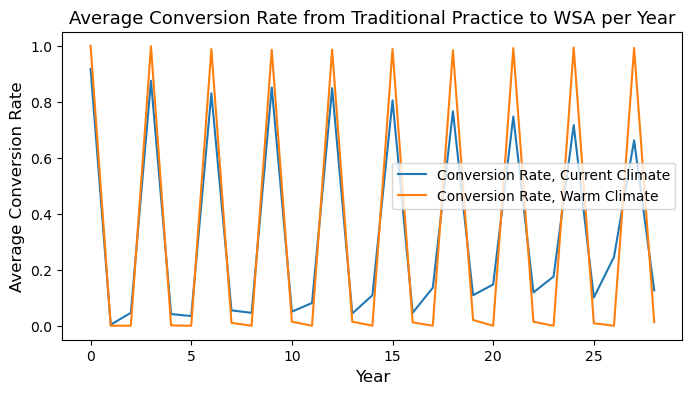

In [276]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)

#ax.set(title="Average yield per year", xlabel="Year", ylabel="Average yield")
ax.plot(convert_rates_5_no_c[1:], label = "Conversion Rate, Current Climate")
ax.plot(convert_rates_5_no_w[1:], label = "Conversion Rate, Warm Climate")

ax.set_title("Average Conversion Rate from Traditional Practice to WSA per Year", fontsize=13)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Average Conversion Rate", fontsize=12)
ax.legend(loc='best')